In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble, metrics
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
import random
import seaborn as sns
import itertools

In [2]:
#read in the data
df_2012 = pd.read_csv('Data/brfss_2012_clean.csv')

In [3]:
#Select indices you want to keep out of X
indices = [name for name in df_2012.columns if name != 'fallinj2']#Take out injuries because we don't train on them
indices2 = [name for name in indices if name != 'recordid']#Take out record label...it's an arbitrary label
indices3 = [name for name in indices2 if name != 'fall12mn']#Take out fall's, it's the y variable, not a feature
indices4 = [name for name in indices3 if name != 'x.state']#state is probably causing overfitting, remove

In [4]:
X = df_2012[indices4]

In [5]:
X.shape

(114109, 34)

In [6]:
y_r = df_2012['fall12mn'] #this contains the number of times each person fell

In [7]:
#convert to a fall/didn't fall target
y_c = []
for fallnum in y_r.tolist():
    if fallnum < 1:
        y_c.append(fallnum)
    elif fallnum >= 1.0:
        y_c.append(1.0)

In [8]:
y_c = pd.Series(y_c,name='fall12mn')

In [9]:
X_positives = X.loc[y_c == 1]

In [10]:
y_positives = y_c.loc[y_c == 1]

In [11]:
positive_indices = X_positives.index

In [12]:
negative_indices = []
for i in X.index:
    if i not in positive_indices:
        negative_indices.append(i)

In [13]:
positive_indices

Int64Index([     2,      3,      6,      8,      9,     11,     21,     24,
                27,     31,
            ...
            114067, 114068, 114071, 114078, 114084, 114086, 114087, 114089,
            114097, 114104],
           dtype='int64', length=27370)

In [14]:
rand_smpl_neg_indices = [ negative_indices[i] for i in sorted(random.sample(xrange(len(negative_indices)), len(positive_indices.tolist()))) ]

In [15]:
negative_indices

[0,
 1,
 4,
 5,
 7,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 23,
 25,
 26,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 69,
 70,
 71,
 72,
 75,
 76,
 78,
 79,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 113,
 118,
 119,
 121,
 123,
 126,
 127,
 128,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 160,
 161,
 163,
 164,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 186,
 187,
 189,
 190,
 192,
 194,
 195,
 197,
 198,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 216,
 218,
 220,
 221,
 223,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 236,
 237,
 238,
 240,
 241,
 24

In [16]:
rand_smpl_neg_indices

[4,
 5,
 12,
 14,
 16,
 20,
 25,
 26,
 29,
 36,
 41,
 44,
 45,
 47,
 48,
 50,
 60,
 64,
 66,
 67,
 71,
 75,
 78,
 79,
 81,
 86,
 95,
 98,
 99,
 100,
 101,
 106,
 107,
 113,
 121,
 123,
 126,
 127,
 130,
 132,
 136,
 146,
 151,
 155,
 160,
 163,
 173,
 176,
 178,
 181,
 186,
 190,
 204,
 205,
 206,
 209,
 212,
 214,
 220,
 227,
 231,
 234,
 236,
 241,
 248,
 251,
 254,
 258,
 266,
 272,
 279,
 280,
 285,
 289,
 302,
 304,
 309,
 317,
 322,
 323,
 325,
 326,
 328,
 335,
 342,
 346,
 347,
 351,
 352,
 367,
 369,
 375,
 378,
 380,
 382,
 386,
 397,
 398,
 400,
 403,
 408,
 418,
 425,
 426,
 428,
 436,
 440,
 441,
 444,
 459,
 471,
 476,
 477,
 480,
 512,
 513,
 516,
 519,
 523,
 532,
 538,
 540,
 543,
 549,
 556,
 560,
 561,
 562,
 563,
 568,
 570,
 573,
 574,
 579,
 591,
 594,
 598,
 599,
 608,
 609,
 610,
 612,
 618,
 628,
 630,
 634,
 638,
 639,
 647,
 651,
 664,
 670,
 682,
 686,
 691,
 697,
 705,
 710,
 719,
 722,
 725,
 727,
 732,
 733,
 734,
 739,
 743,
 744,
 750,
 762,
 763,
 768,

In [17]:
X_negatives = X.loc[rand_smpl_neg_indices]
y_negatives = y_c.loc[rand_smpl_neg_indices]

In [18]:
X_negatives.head(10)

,numadult,nummen,numwomen,genhlth,physhlth,menthlth,persdoc2,medcost,checkup1,exerany2,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd1,havarth3,addepev2,chckidny,chcvisn1,diabete3,age,hispanc2,children,educa,employ,weight2,height3,cpdemo1,sex,useequip,smokday2,alcday5
4,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,5.0,5.0,114.0,62.0,1.0,0,0.0,0.0,0.000000
5,4.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,1.0,5.0,1.0,163.0,67.0,0.0,0,0.0,0.0,0.000000
12,2.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0.0,0.0,4.0,3.0,242.0,73.0,1.0,1,0.0,0.0,0.000000
14,3.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,5.0,1.0,160.0,61.0,1.0,0,0.0,0.0,0.000000
16,2.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48.0,0.0,1.0,5.0,5.0,125.0,66.0,1.0,0,0.0,0.0,4.285714
20,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,4.0,1.0,115.0,63.0,1.0,0,0.0,1.0,0.000000
25,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57.0,0.0,0.0,4.0,5.0,128.0,64.0,1.0,0,0.0,0.0,0.000000
26,2.0,1.0,1.0,2.0,0.0,15.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,67.0,0.0,0.0,6.0,2.0,200.0,68.0,1.0,1,0.0,0.0,4.285714
29,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,65.0,0.0,0.0,5.0,3.0,163.0,69.0,1.0,1,0.0,0.0,4.285714
36,1.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,0.0,0.0,3.0,1.0,160.0,64.0,1.0,0,0.0,0.0,0.000000


In [19]:
y_negatives

4         0.0
5         0.0
12        0.0
14        0.0
16        0.0
20        0.0
25        0.0
26        0.0
29        0.0
36        0.0
41        0.0
44        0.0
45        0.0
47        0.0
48        0.0
50        0.0
60        0.0
64        0.0
66        0.0
67        0.0
71        0.0
75        0.0
78        0.0
79        0.0
81        0.0
86        0.0
95        0.0
98        0.0
99        0.0
100       0.0
         ... 
113993    0.0
113996    0.0
113997    0.0
114004    0.0
114006    0.0
114010    0.0
114011    0.0
114014    0.0
114018    0.0
114022    0.0
114023    0.0
114025    0.0
114031    0.0
114032    0.0
114039    0.0
114040    0.0
114041    0.0
114044    0.0
114047    0.0
114051    0.0
114063    0.0
114069    0.0
114073    0.0
114080    0.0
114083    0.0
114100    0.0
114101    0.0
114102    0.0
114105    0.0
114107    0.0
Name: fall12mn, dtype: float64

In [20]:
X_negatives.columns

Index([u'numadult', u'nummen', u'numwomen', u'genhlth', u'physhlth',
       u'menthlth', u'persdoc2', u'medcost', u'checkup1', u'exerany2',
       u'cvdinfr4', u'cvdcrhd4', u'cvdstrk3', u'asthma3', u'chcscncr',
       u'chcocncr', u'chccopd1', u'havarth3', u'addepev2', u'chckidny',
       u'chcvisn1', u'diabete3', u'age', u'hispanc2', u'children', u'educa',
       u'employ', u'weight2', u'height3', u'cpdemo1', u'sex', u'useequip',
       u'smokday2', u'alcday5'],
      dtype='object')

In [21]:
y_negatives.shape

(27370,)

In [22]:
y_positives.shape

(27370,)

In [23]:
#concatenate subsampled negative targes and all positive targets
y_balanced = pd.concat([y_negatives,y_positives])

In [24]:
#do the same for the data
X_balanced = pd.concat([X_negatives,X_positives])

In [25]:
X_balanced.shape

(54740, 34)

In [26]:
X_balanced.columns

Index([u'numadult', u'nummen', u'numwomen', u'genhlth', u'physhlth',
       u'menthlth', u'persdoc2', u'medcost', u'checkup1', u'exerany2',
       u'cvdinfr4', u'cvdcrhd4', u'cvdstrk3', u'asthma3', u'chcscncr',
       u'chcocncr', u'chccopd1', u'havarth3', u'addepev2', u'chckidny',
       u'chcvisn1', u'diabete3', u'age', u'hispanc2', u'children', u'educa',
       u'employ', u'weight2', u'height3', u'cpdemo1', u'sex', u'useequip',
       u'smokday2', u'alcday5'],
      dtype='object')

In [27]:
categoricals = ['genhlth','checkup1','diabete3','educa','employ','smokday2']

In [28]:
X_balanced_c = pd.get_dummies(X_balanced,columns = categoricals)

In [29]:
X_balanced_c.columns

Index([u'numadult', u'nummen', u'numwomen', u'physhlth', u'menthlth',
       u'persdoc2', u'medcost', u'exerany2', u'cvdinfr4', u'cvdcrhd4',
       u'cvdstrk3', u'asthma3', u'chcscncr', u'chcocncr', u'chccopd1',
       u'havarth3', u'addepev2', u'chckidny', u'chcvisn1', u'age', u'hispanc2',
       u'children', u'weight2', u'height3', u'cpdemo1', u'sex', u'useequip',
       u'alcday5', u'genhlth_1.0', u'genhlth_2.0', u'genhlth_3.0',
       u'genhlth_4.0', u'genhlth_5.0', u'checkup1_1.0', u'checkup1_2.0',
       u'checkup1_3.0', u'checkup1_4.0', u'checkup1_8.0', u'diabete3_0.0',
       u'diabete3_1.0', u'diabete3_4.0', u'educa_1.0', u'educa_2.0',
       u'educa_3.0', u'educa_4.0', u'educa_5.0', u'educa_6.0', u'employ_1.0',
       u'employ_2.0', u'employ_3.0', u'employ_4.0', u'employ_5.0',
       u'smokday2_0.0', u'smokday2_0.5', u'smokday2_1.0'],
      dtype='object')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced_c, y_balanced, test_size=0.2, random_state = 0)

In [31]:
X_train.index

Int64Index([ 28960,  75364,  76467,   5587,  55556,  27663,  88001,  57346,
             79429,  31543,
            ...
             86606,  60887,  18894,  11302,  88658,  77214, 104872,  63144,
             66883,  11705],
           dtype='int64', length=43792)

In [32]:
y_train.index

Int64Index([ 28960,  75364,  76467,   5587,  55556,  27663,  88001,  57346,
             79429,  31543,
            ...
             86606,  60887,  18894,  11302,  88658,  77214, 104872,  63144,
             66883,  11705],
           dtype='int64', length=43792)

In [33]:
X_train.shape

(43792, 55)

In [34]:
y_train.shape

(43792,)

In [35]:
#Print out a table for the talk
X_train.head(10)

,numadult,nummen,numwomen,physhlth,menthlth,persdoc2,medcost,exerany2,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd1,havarth3,addepev2,chckidny,chcvisn1,age,hispanc2,children,weight2,height3,cpdemo1,sex,useequip,alcday5,genhlth_1.0,genhlth_2.0,genhlth_3.0,genhlth_4.0,genhlth_5.0,checkup1_1.0,checkup1_2.0,checkup1_3.0,checkup1_4.0,checkup1_8.0,diabete3_0.0,diabete3_1.0,diabete3_4.0,educa_1.0,educa_2.0,educa_3.0,educa_4.0,educa_5.0,educa_6.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,smokday2_0.0,smokday2_0.5,smokday2_1.0
28960,2.0,1.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0,0.0,240.0,67.0,1.0,0,1.0,0.000000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
75364,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,130.0,69.0,1.0,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
76467,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,150.0,64.0,1.0,0,0.0,4.285714,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
5587,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61.0,0.0,0.0,120.0,61.0,1.0,0,0.0,5.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
55556,2.0,1.0,1.0,5.0,15.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,57.0,0.0,0.0,253.0,66.0,1.0,0,0.0,0.000000,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
27663,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,110.0,60.0,1.0,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
88001,4.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47.0,0.0,0.0,250.0,73.0,1.0,1,0.0,2.000000,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
57346,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,170.0,69.0,1.0,1,0.0,30.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
79429,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.0,0.0,0.0,210.0,64.0,1.0,0,1.0,0.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
31543,2.0,0.0,2.0,15.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,46.0,0.0,1.0,180.0,66.0,0.0,0,0.0,3.000000,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [36]:
#just try using the default parameters
rfc = ensemble.RandomForestClassifier(n_estimators=500, n_jobs = -1)

In [37]:
rfc = rfc.fit(X_train,y_train)

In [38]:
pred_train = rfc.predict(X_train)

In [39]:
pred_train.tolist()

[1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0

In [40]:
y_train

28960     1.0
75364     0.0
76467     1.0
5587      1.0
55556     1.0
27663     1.0
88001     1.0
57346     1.0
79429     1.0
31543     1.0
92106     0.0
56596     0.0
27215     0.0
47908     0.0
886       1.0
52585     1.0
3361      1.0
94732     0.0
65241     1.0
49239     1.0
15945     0.0
25222     1.0
52222     1.0
25675     0.0
86728     1.0
9812      0.0
67668     1.0
12453     0.0
15742     0.0
32248     0.0
         ... 
9257      0.0
47413     1.0
28896     0.0
48597     1.0
353       1.0
70801     0.0
33468     1.0
100702    0.0
100809    1.0
64982     1.0
79578     0.0
19445     1.0
71451     0.0
61395     0.0
105460    1.0
51126     1.0
89133     1.0
64750     0.0
62636     0.0
81410     1.0
86606     0.0
60887     1.0
18894     1.0
11302     1.0
88658     0.0
77214     1.0
104872    1.0
63144     1.0
66883     1.0
11705     0.0
Name: fall12mn, dtype: float64

In [41]:
accuracy_train = metrics.accuracy_score(y_train,pred_train)

In [42]:
accuracy_train

0.99993149433686523

In [43]:
pred_test = rfc.predict(X_test)

In [44]:
accuracy_test = metrics.accuracy_score(y_test,pred_test)

In [45]:
accuracy_test

0.59810010960906101

In [46]:
sum(pred_test)/len(pred_test)

0.4891304347826087

In [47]:
importances = []
features = []

In [48]:
for col, imp in zip (X_train.columns, rfc.feature_importances_):
    print col, imp

numadult 0.030810297912
nummen 0.023420623649
numwomen 0.0209550795959
physhlth 0.0456317804328
menthlth 0.0394582533559
persdoc2 0.0121682172075
medcost 0.0100474492827
exerany2 0.0170322554732
cvdinfr4 0.00507031567629
cvdcrhd4 0.00543575898942
cvdstrk3 0.0035973273239
asthma3 0.0110505541177
chcscncr 0.0112798156429
chcocncr 0.0108486237137
chccopd1 0.00615470105121
havarth3 0.0166931262556
addepev2 0.0165586075511
chckidny 0.00424227606308
chcvisn1 0.0126315503214
age 0.107030806238
hispanc2 0.0069132830958
children 0.0288058673449
weight2 0.121434322568
height3 0.0927297520296
cpdemo1 0.0131411144663
sex 0.0116511785831
useequip 0.00973303900379
alcday5 0.0759982430553
genhlth_1.0 0.0103421674691
genhlth_2.0 0.0146910464675
genhlth_3.0 0.0140571386021
genhlth_4.0 0.00718389273905
genhlth_5.0 0.00251508505199
checkup1_1.0 0.0136279846747
checkup1_2.0 0.0110172445576
checkup1_3.0 0.00812815442926
checkup1_4.0 0.00782606955632
checkup1_8.0 0.0018735002309
diabete3_0.0 0.0091987892669

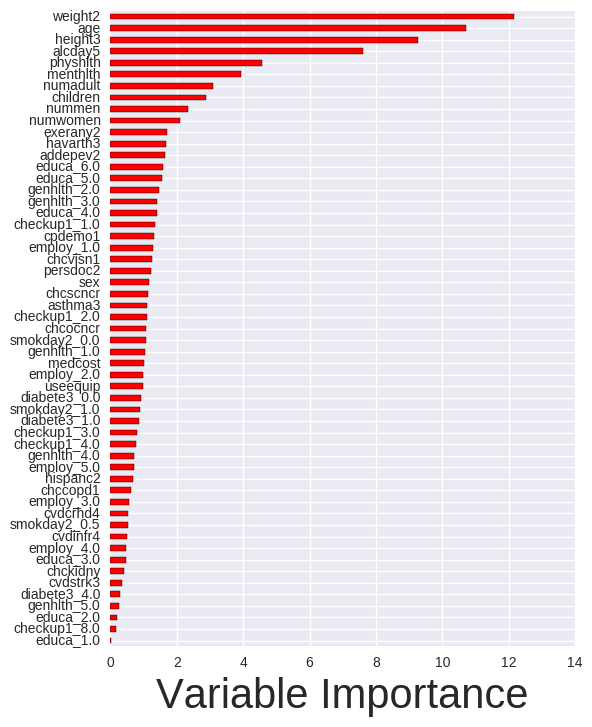

In [57]:
Importance = pd.DataFrame({'Importance':rfc.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize = (6,8.2))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.gca().xaxis.label.set_size(30)

In [162]:
recall = metrics.recall_score(y_test,pred_test)

In [163]:
recall

0.58686556303438242

In [52]:
sum(y_test)

5497.0

In [53]:
sum(pred_test)

5355.0

In [55]:
float(sum(pred_test))/5497

0.9741677278515554

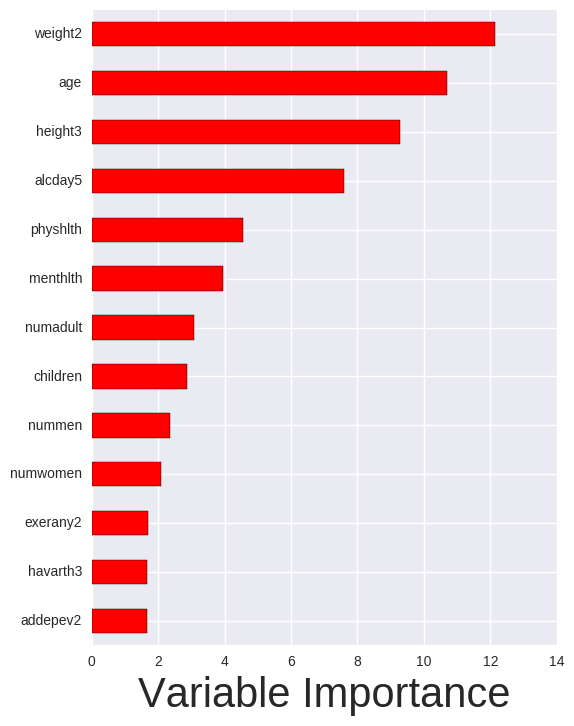

In [62]:
#Make Variable Importance plot with features for presentation
Importance = pd.DataFrame({'Importance':rfc.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).tail(13).plot(kind='barh', color='r', figsize = (6,8.2))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.gca().xaxis.label.set_size(30)

In [156]:
cm = metrics.confusion_matrix(y_test,pred_test,labels=[0, 1])

In [157]:
cm

array([[3322, 2129],
       [2271, 3226]])

In [160]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)-2)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 5000000000000000.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f' % cm[i, j],
                 horizontalalignment="center",
                 color="white" if i==j else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[ 0.60942946  0.39057054]
 [ 0.41313444  0.58686556]]


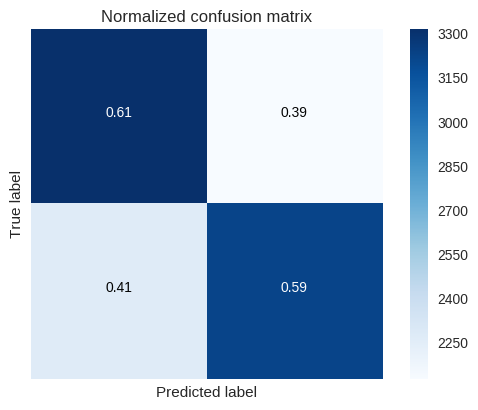

In [161]:
plt.figure()
plot_confusion_matrix(cm, classes=['No Fall', 'Fall'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
cm.shape

(2, 2)

In [169]:
pred_test.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0

In [170]:
y_test

43448     0.0
101309    0.0
61393     1.0
39032     0.0
18764     0.0
112283    1.0
57930     1.0
49860     0.0
10036     1.0
108479    0.0
98137     0.0
83567     0.0
87840     1.0
81016     0.0
22141     1.0
70908     0.0
111192    1.0
4166      0.0
86360     0.0
30410     1.0
69860     0.0
109655    0.0
2641      0.0
31189     1.0
76947     0.0
52967     0.0
69697     1.0
87489     0.0
56652     0.0
57970     0.0
         ... 
27547     0.0
82362     1.0
2793      1.0
23307     0.0
102091    0.0
83062     1.0
110563    0.0
46554     1.0
96053     0.0
90770     0.0
62611     1.0
46525     0.0
109119    0.0
20646     1.0
14679     1.0
64083     1.0
97726     1.0
28455     1.0
111793    0.0
42418     0.0
5699      0.0
6839      0.0
90771     0.0
73067     0.0
5820      0.0
16201     1.0
57555     1.0
12210     0.0
21619     1.0
112250    1.0
Name: fall12mn, dtype: float64

In [172]:
(.5*24+.5*77)/24

2.1041666666666665

In [173]:
(.6*24+.4*77)/24

1.8833333333333335

In [174]:
2.1/1.88

1.1170212765957448